In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as tf
from tensorflow.keras import models, layers, optimizers
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("CarPrice_Assignment.csv")
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [3]:
data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [4]:
np.where(data.applymap(lambda x: x ==''))
data.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [5]:
data.iloc[3,2] = 'audi 100ls'

In [6]:
data.drop(columns=['car_ID'], inplace = True)
data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [7]:
car = pd.get_dummies(data, columns=['CarName','symboling','fueltype',	'aspiration',	'doornumber',	'carbody',	'drivewheel',	'enginelocation',	'enginetype',	'cylindernumber',	'fuelsystem'], drop_first = True)
car.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,...,0.004878,0.004878,0.019512,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,...,0.069843,0.069843,0.138655,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
np.random.seed(1111)
s = np.random.rand(len(car)) < 0.72
train_total = car[s]
test_total = car[~s]
train_total.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.0,146.000000,146.000000,146.000000,146.000000,146.0,146.000000,146.000000,146.000000
mean,99.160274,174.674658,65.945205,53.728082,2570.130137,126.739726,3.341370,3.269589,10.205548,105.260274,...,0.006849,0.0,0.027397,0.308219,0.020548,0.102740,0.0,0.465753,0.061644,0.006849
std,6.374069,12.573002,2.131151,2.408283,518.267156,40.358233,0.279225,0.314729,4.041525,38.238102,...,0.082761,0.0,0.163800,0.463347,0.142354,0.304664,0.0,0.500543,0.241335,0.082761
min,86.600000,141.100000,60.300000,48.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,94.500000,168.700000,64.200000,52.000000,2205.250000,97.000000,3.150000,3.150000,8.600000,70.500000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,97.200000,173.200000,65.500000,54.000000,2417.000000,120.000000,3.310000,3.290000,9.000000,97.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,102.900000,185.825000,66.900000,55.500000,2932.750000,145.750000,3.612500,3.410000,9.400000,119.000000,...,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,308.000000,3.940000,4.170000,23.000000,288.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [9]:
test_total.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,...,59.0,59.000000,59.0,59.000000,59.0,59.000000,59.000000,59.000000,59.0,59.0
mean,97.757627,172.501695,65.815254,53.716949,2519.525424,127.322034,3.301017,3.220339,9.986610,101.288136,...,0.0,0.016949,0.0,0.355932,0.0,0.084746,0.016949,0.440678,0.0,0.0
std,4.954211,11.693286,2.195278,2.549723,529.333978,45.023151,0.248830,0.310650,3.823916,42.816389,...,0.0,0.130189,0.0,0.482905,0.0,0.280894,0.130189,0.500730,0.0,0.0
min,88.600000,150.000000,63.600000,47.800000,1837.000000,79.000000,2.910000,2.190000,7.000000,55.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
25%,94.500000,165.500000,64.000000,51.800000,2101.500000,98.000000,3.050000,3.050000,8.550000,69.500000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
50%,96.500000,172.400000,65.400000,54.100000,2410.000000,110.000000,3.330000,3.270000,9.000000,88.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
75%,99.150000,178.350000,66.500000,55.500000,2882.500000,135.000000,3.505000,3.400000,9.355000,115.000000,...,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.000000,1.000000,0.0,0.0
max,115.600000,202.600000,71.700000,59.800000,3950.000000,326.000000,3.780000,3.900000,22.700000,262.000000,...,0.0,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0


In [10]:
train_label = train_total.loc[:,'price']
test_label = test_total.loc[:,'price']
test_data= test_total.drop(columns = ['price'])
train_data= train_total.drop(columns = ['price'])
train_data

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0
5,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,...,0,0,0,0,0,0,0,1,0,0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,...,0,0,0,0,0,0,0,1,0,0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,...,0,0,0,0,0,0,0,1,0,0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,...,0,0,0,0,0,1,0,0,0,0


In [11]:
{train_data.columns.get_loc(c): c for idx, c in enumerate(train_data.columns)}

{0: 'wheelbase',
 1: 'carlength',
 2: 'carwidth',
 3: 'carheight',
 4: 'curbweight',
 5: 'enginesize',
 6: 'boreratio',
 7: 'stroke',
 8: 'compressionratio',
 9: 'horsepower',
 10: 'peakrpm',
 11: 'citympg',
 12: 'highwaympg',
 13: 'CarName_alfa-romero Quadrifoglio',
 14: 'CarName_alfa-romero giulia',
 15: 'CarName_alfa-romero stelvio',
 16: 'CarName_audi 100ls',
 17: 'CarName_audi 4000',
 18: 'CarName_audi 5000',
 19: 'CarName_audi 5000s (diesel)',
 20: 'CarName_audi fox',
 21: 'CarName_bmw 320i',
 22: 'CarName_bmw x1',
 23: 'CarName_bmw x3',
 24: 'CarName_bmw x4',
 25: 'CarName_bmw x5',
 26: 'CarName_bmw z4',
 27: 'CarName_buick century',
 28: 'CarName_buick century luxus (sw)',
 29: 'CarName_buick century special',
 30: 'CarName_buick electra 225 custom',
 31: 'CarName_buick opel isuzu deluxe',
 32: 'CarName_buick regal sport coupe (turbo)',
 33: 'CarName_buick skyhawk',
 34: 'CarName_buick skylark',
 35: 'CarName_chevrolet impala',
 36: 'CarName_chevrolet monte carlo',
 37: 'CarNam

In [12]:
mean = train_data.iloc[:,0:13].mean(axis=0) 
train_data.iloc[:,0:13] -= mean
std = train_data.iloc[:,0:13].std(axis=0)
train_data.iloc[:,0:13] /= std
test_data.iloc[:,0:13] -= mean
test_data.iloc[:,0:13] /= std

In [13]:
mean_label = train_label.mean()
train_label -= mean_label
std_label = train_label.std()
train_label /= std_label
test_label -= mean_label
test_label /= std_label
test = np.array(test_data.iloc[:]).astype('float32')
train = np.array(train_data.iloc[:]).astype('float32')
test_l= np.array(test_label.astype('float32'))
train_l= np.array(train_label.astype('float32'))

In [14]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [15]:

from keras import models
from keras import layers
def build_model(act):
  model = models.Sequential()
  model.add(layers.Dense(128, activation= act,input_shape=(train.shape[1],)))
  model.add(layers.Dense(64, activation= act))
  model.add(layers.Dense(32, activation= act))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model
build_model('relu').summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               24704     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 35,073
Trainable params: 35,073
Non-trainable params: 0
_________________________________________________________________


In [16]:
build_model('tanh').summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               24704     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 35,073
Trainable params: 35,073
Non-trainable params: 0
_________________________________________________________________


In [17]:
from keras import regularizers
def build_model_regular(act):
  model = models.Sequential()
  model.add(layers.Dense(10, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001),input_shape=(train.shape[1],)))
  model.add(layers.Dense(8, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
  model.add(layers.Dense(6, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model
build_model_regular('tanh').summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                1930      
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 2,079
Trainable params: 2,079
Non-trainable params: 0
_________________________________________________________________


In [18]:
from keras import regularizers
def build_model_drop(act):
  model = models.Sequential()
  model.add(layers.Dense(10, activation= act,input_shape=(train.shape[1],)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(8, activation= act))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(6, activation= act))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model
build_model_drop('relu').summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                1930      
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 88        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 54        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                

In [19]:
import numpy as np
k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_relu = []
for i in range(k):
  print('processing fold #', i)
  val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
  partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
  model = build_model('relu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_relu.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [20]:
k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_tanh = []
for i in range(k):
  print('processing fold #', i)
  val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
  partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
  model = build_model('tanh')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_tanh.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [21]:
k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_regular = []
for i in range(k):
  print('processing fold #', i)
  val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
  partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
  model = build_model_regular('relu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_regular.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [22]:
k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_drop = []
for i in range(k):
  print('processing fold #', i)
  val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
  partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
  model = build_model_drop('relu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=1)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
  all_scores_drop.append(val_mae)

processing fold # 0
Epoch 1/100
110/110 [==============================] - 1s 897us/step - loss: 1.1427 - mae: 0.7423
Epoch 2/100
110/110 [==============================] - 0s 937us/step - loss: 1.1702 - mae: 0.7110
Epoch 3/100
110/110 [==============================] - 0s 914us/step - loss: 0.4816 - mae: 0.5298
Epoch 4/100
110/110 [==============================] - 0s 917us/step - loss: 0.3646 - mae: 0.4312
Epoch 5/100
110/110 [==============================] - 0s 950us/step - loss: 0.5070 - mae: 0.4143
Epoch 6/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4528 - mae: 0.4748
Epoch 7/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4670 - mae: 0.4132
Epoch 8/100
110/110 [==============================] - 0s 990us/step - loss: 0.4397 - mae: 0.4598
Epoch 9/100
110/110 [==============================] - 0s 971us/step - loss: 0.2921 - mae: 0.3697
Epoch 10/100
110/110 [==============================] - 0s 908us/step - loss: 0.3916 - mae: 0.3629
Epo

110/110 [==============================] - 0s 917us/step - loss: 0.2947 - mae: 0.3535
Epoch 85/100
110/110 [==============================] - 0s 909us/step - loss: 0.3793 - mae: 0.3403
Epoch 86/100
110/110 [==============================] - 0s 844us/step - loss: 0.1281 - mae: 0.2267
Epoch 87/100
110/110 [==============================] - 0s 1ms/step - loss: 0.1925 - mae: 0.2192
Epoch 88/100
110/110 [==============================] - 0s 1ms/step - loss: 0.1361 - mae: 0.2239
Epoch 89/100
110/110 [==============================] - 0s 955us/step - loss: 0.2424 - mae: 0.2677
Epoch 90/100
110/110 [==============================] - 0s 899us/step - loss: 0.2604 - mae: 0.2762
Epoch 91/100
110/110 [==============================] - 0s 899us/step - loss: 0.1550 - mae: 0.2581
Epoch 92/100
110/110 [==============================] - 0s 862us/step - loss: 0.2570 - mae: 0.2967
Epoch 93/100
110/110 [==============================] - 0s 1ms/step - loss: 1.0515 - mae: 0.4603
Epoch 94/100
110/110 [=======

110/110 [==============================] - 0s 881us/step - loss: 0.1368 - mae: 0.2867
Epoch 59/100
110/110 [==============================] - 0s 835us/step - loss: 0.0968 - mae: 0.2258
Epoch 60/100
110/110 [==============================] - 0s 881us/step - loss: 0.1843 - mae: 0.3271
Epoch 61/100
110/110 [==============================] - 0s 927us/step - loss: 0.2451 - mae: 0.3160
Epoch 62/100
110/110 [==============================] - 0s 936us/step - loss: 0.2100 - mae: 0.3226
Epoch 63/100
110/110 [==============================] - 0s 890us/step - loss: 0.1665 - mae: 0.2848
Epoch 64/100
110/110 [==============================] - 0s 900us/step - loss: 0.2679 - mae: 0.3492
Epoch 65/100
110/110 [==============================] - 0s 908us/step - loss: 0.2237 - mae: 0.3408
Epoch 66/100
110/110 [==============================] - 0s 883us/step - loss: 0.1348 - mae: 0.2742
Epoch 67/100
110/110 [==============================] - 0s 904us/step - loss: 0.0976 - mae: 0.2111
Epoch 68/100
110/110 [=

110/110 [==============================] - 0s 945us/step - loss: 0.5896 - mae: 0.4738
Epoch 34/100
110/110 [==============================] - 0s 1ms/step - loss: 0.2850 - mae: 0.3319
Epoch 35/100
110/110 [==============================] - 0s 1ms/step - loss: 0.2907 - mae: 0.2976
Epoch 36/100
110/110 [==============================] - 0s 1ms/step - loss: 0.3093 - mae: 0.3501
Epoch 37/100
110/110 [==============================] - 0s 1ms/step - loss: 0.3101 - mae: 0.3591
Epoch 38/100
110/110 [==============================] - 0s 1ms/step - loss: 0.2811 - mae: 0.3989
Epoch 39/100
110/110 [==============================] - 0s 954us/step - loss: 0.4547 - mae: 0.3951
Epoch 40/100
110/110 [==============================] - 0s 982us/step - loss: 0.5957 - mae: 0.4134
Epoch 41/100
110/110 [==============================] - 0s 1ms/step - loss: 0.3011 - mae: 0.2949
Epoch 42/100
110/110 [==============================] - 0s 1ms/step - loss: 0.2567 - mae: 0.3851
Epoch 43/100
110/110 [===============

110/110 [==============================] - 0s 1ms/step - loss: 0.3891 - mae: 0.4269
Epoch 9/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4873 - mae: 0.5045
Epoch 10/100
110/110 [==============================] - 0s 917us/step - loss: 0.6564 - mae: 0.5232
Epoch 11/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4168 - mae: 0.4224
Epoch 12/100
110/110 [==============================] - 0s 1ms/step - loss: 0.3848 - mae: 0.4219
Epoch 13/100
110/110 [==============================] - 0s 1ms/step - loss: 0.2946 - mae: 0.3765
Epoch 14/100
110/110 [==============================] - 0s 1ms/step - loss: 0.2257 - mae: 0.3458
Epoch 15/100
110/110 [==============================] - 0s 991us/step - loss: 0.4719 - mae: 0.4592
Epoch 16/100
110/110 [==============================] - 0s 982us/step - loss: 0.3109 - mae: 0.4045
Epoch 17/100
110/110 [==============================] - 0s 853us/step - loss: 1.0135 - mae: 0.6155
Epoch 18/100
110/110 [==============

110/110 [==============================] - 0s 908us/step - loss: 0.3389 - mae: 0.3516
Epoch 92/100
110/110 [==============================] - 0s 916us/step - loss: 0.2854 - mae: 0.3635
Epoch 93/100
110/110 [==============================] - 0s 959us/step - loss: 0.2079 - mae: 0.3373
Epoch 94/100
110/110 [==============================] - 0s 892us/step - loss: 0.3033 - mae: 0.2870
Epoch 95/100
110/110 [==============================] - 0s 910us/step - loss: 0.1767 - mae: 0.2578
Epoch 96/100
110/110 [==============================] - 0s 910us/step - loss: 0.1895 - mae: 0.2904
Epoch 97/100
110/110 [==============================] - 0s 933us/step - loss: 0.3144 - mae: 0.3393
Epoch 98/100
110/110 [==============================] - 0s 913us/step - loss: 0.2725 - mae: 0.3213
Epoch 99/100
110/110 [==============================] - 0s 977us/step - loss: 0.2674 - mae: 0.3297
Epoch 100/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1894 - mae: 0.3559


In [23]:
all_scores_relu

[0.5526487231254578,
 0.28436338901519775,
 0.4766376316547394,
 0.483881413936615]

In [24]:
all_scores_tanh

[0.44608762860298157,
 0.2869463264942169,
 0.6271803379058838,
 0.5252214670181274]

In [25]:
all_scores_drop

[0.555001974105835, 0.3738769292831421, 0.5830333232879639, 0.3559245467185974]

In [26]:
all_scores_regular

[0.364339679479599, 0.2324236035346985, 0.5522539019584656, 0.5733236074447632]

In [27]:
model_tanh = build_model('tanh')
model_tanh.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_tanh.evaluate(test, test_l)


model_relu = build_model('relu')
model_relu.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_relu.evaluate(test, test_l)



model_drop = build_model_drop('relu')
model_drop.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_drop.evaluate(test, test_l)


model_regular = build_model_regular('relu')
model_regular.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_regular.evaluate(test, test_l)

2/2 [==============================] - 0s 3ms/step - loss: 0.1194 - mae: 0.1949


In [28]:
def predict(model, m):
  print(f" the Actual value Price was : {test_l[m]* std_label + mean_label} " )
  return(f" the predicted Price was : {(model.predict(test[m:m+1].reshape(1,test.shape[1]))) * std_label + mean_label} ")
x_tanh = predict(model_tanh,2)
x_tanh



 the Actual value Price was : 17859.16696592013 


' the predicted Price was : [[18970.516]] '

In [29]:
x_relu = predict(model_relu,2)
x_relu



 the Actual value Price was : 17859.16696592013 


' the predicted Price was : [[17979.338]] '

In [30]:
x_regular = predict(model_regular,2)
x_regular


 the Actual value Price was : 17859.16696592013 


' the predicted Price was : [[18360.826]] '

In [31]:
x_drop = predict(model_drop,2)
x_drop

 the Actual value Price was : 17859.16696592013 


' the predicted Price was : [[17232.248]] '

In [32]:
def plot_fn(mod):
  y_true = test_l* std_label + mean_label
  y_pred = mod.predict(test) * std_label + mean_label
  return y_true , y_pred.flatten()


In [33]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def plotting(mod, label):
  y_true, y_pred = plot_fn(mod)
  coef = np.polyfit(y_true,y_pred,1)
  poly1d_fn = np.poly1d(coef) 
  plt.figure()
  plt.plot(y_true,y_pred, 'yo', y_true, poly1d_fn(y_true), '--k')
  plt.title(label)
  plt.xlabel('Thousand Dollar True' )
  plt.ylabel('Thousand Dollar Predictions' )
  plt.xlim(0, 50000)
  plt.ylim(0, 50000)




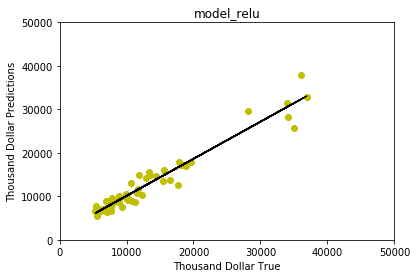

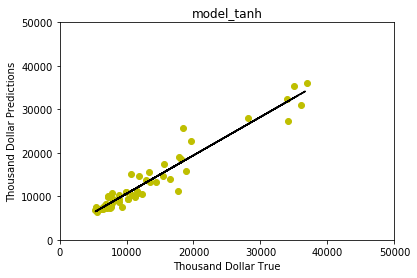

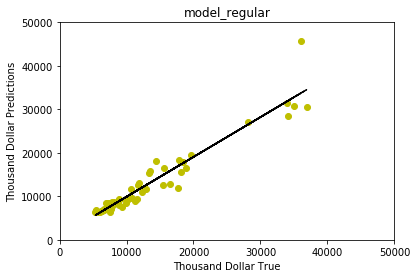

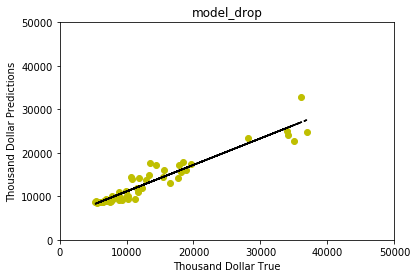

In [34]:
plot_list = []
for i,j in enumerate([model_relu, model_tanh, model_regular, model_drop]):
  list_name = ['model_relu', 'model_tanh', 'model_regular', 'model_drop']
  plot_list.append(plotting(j,list_name[i]))